# 13 有监督学习-分类器与鸢尾花识别


## 13.1 模块导入

In [3]:
import sklearn as sk
print ('scikit-learn version:', sk.__version__)

scikit-learn version: 0.24.1


- 导入配套使用的模块

In [4]:
%pylab inline

import IPython
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 7.8.0
numpy version: 1.16.6
matplotlib version: 3.1.1


# 13.2  分类器问题

### 13.2.1 鸢尾花（iris）的分类问题


- 鸢尾花图片
<img src="images/ch13/iris_flower.jpg" width =300>


- 考虑训练数据集（含 $n$ 条样本，或记录）
    - 每条样本中，有多个数据，这些数据称之为属性（attribute）或特征（feature）
    - 如果是有监督学习，还要有目标（target）属性


- 数据集
    - 在 dataset 子模块中
    
    
<img src="images/ch13/flower.jpg" width =300>

### 13.2.2 数据的初期认识

#### (1) 加载数据

In [5]:
from sklearn import datasets
# 加载并返回 iris 数据集
iris = datasets.load_iris() # 位于 root_path\pkgs\scikit-learn-0.19.2-py37heebcf9a_0\Lib\site-packages\sklearn\datasets\data

In [ ]:
datasets.load_iris?

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 普及一下datasets数据集
#### sklearn 的数据集有好多个种

- 自带的小数据集（packaged dataset）：sklearn.datasets.load_<name>  
    - 数据集文件在sklearn安装目录下datasets\data文件下
- 可在线下载的数据集（Downloaded Dataset）：sklearn.datasets.fetch_<name>  
    - 比较大的数据集，主要用于测试解决实际问题，支持在线下载
    - 下载下来的数据，默认保存在~/scikit_learn_data文件夹下，可以通过设置环境变量SCIKIT_LEARN_DATA修改路径，datasets.get_data_home()获取下载路径
- 计算机生成的数据集（Generated Dataset）：sklearn.datasets.make_<name>  
    - 构造数据集
- svmlight/libsvm格式的数据集：sklearn.datasets.load_svmlight_file(...)  
- 从买了data.org在线下载获取的数据集：sklearn.datasets.fetch_mldata(...)

#### 自带的小数据集有哪些？
- datasets.load_boston #波士顿房价数据集  
- datasets.load_breast_cancer #乳腺癌数据集  
- datasets.load_diabetes #糖尿病数据集  
- datasets.load_digits #手写体数字数据集  
- datasets.load_files  
- datasets.load_iris #鸢尾花数据集  
- datasets.load_lfw_pairs  
- datasets.load_lfw_people  
- datasets.load_linnerud #体能训练数据集  
- datasets.load_mlcomp  
- datasets.load_sample_image  
- datasets.load_sample_images  
- datasets.load_svmlight_file  
- datasets.load_svmlight_files  

#### (2) 了解一下数据结构

In [ ]:
#iris.<TAB>

In [12]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#iris.

In [13]:
iris.keys()   # 字典关键字

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- 认识几个不常见的单词 —— 关于 鸢尾花的特征属性
    - sepal 萼片
    - petal 花瓣

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.data  # 4 列依次是 萼片长度、萼片宽度、花瓣长度、花瓣宽度，单位：厘米

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 认识几个不常见的单词 —— 关于分类
    - setosa 山鸢尾花
    - versicolor 变色鸢尾花
    - virginica 维吉尼亚鸢尾花

- 认识三种鸢尾花 —— 从左至右分别是：'setosa'、'versicolor'、'virginica'


<img src="images/ch13/setosa_versicolor_virginica.jpg" width=800>

In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- iris 数据集的介绍

In [41]:
iris.DESCR # DESCR 属性

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [42]:
print(iris.DESCR)  # 格式输出

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### (3) 鸢尾花数据集 (Iris Datasets) 小结


- 基本信息
    - 数据记录 —— 150 条
    - 特征属性 —— 4 条（'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'）
    - 目标属性 —— 1 条（calss）


- 统计数据
    - 表明花瓣的 长度和宽度 与 类别的相关性高，分别达到 0.9490 和 0.9565

## 13.3 数据准备 —— 用于训练与测试

### 13.3.1 导入特征数据、目标数据

In [16]:
# 导入 特征与目标 数据
X_iris, y_iris = iris.data, iris.target

In [17]:
# 查看维度
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [18]:
# 输出首行
X_iris[0], y_iris[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

### 13.3.2 选取部分特征


- 提取属性 —— 前 2 个属性（萼片的长度、宽度）

In [19]:
# 导入分解数据模块
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [20]:
# 提取前 2 个属性
X, y = X_iris[:,:2], y_iris #X, y = X_iris[:,:2], y_iris
#X, y = X_iris[:,:], y_iris
#here

Text(0, 0.5, 'sepal width (cm)')

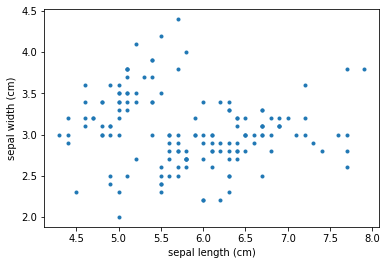

In [21]:
### 
plt.plot(X[:,0],X[:,1],'.')
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'sepal width (cm)')

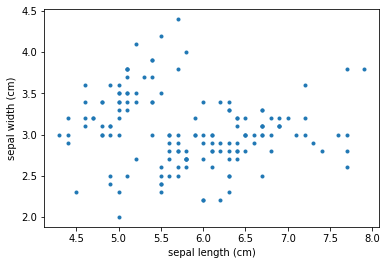

In [22]:
### 
plt.plot(X[:,0],X[:,1],'.')
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'classes')

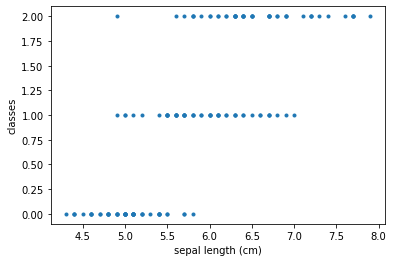

In [23]:
plt.plot(X[:,0],y,'.')
plt.xlabel('sepal length (cm)')
plt.ylabel("classes")

Text(0, 0.5, 'classes')

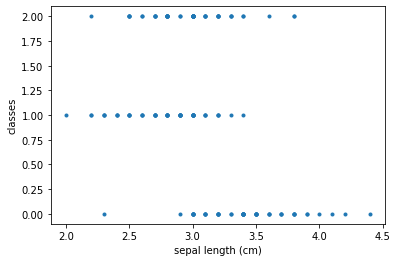

In [24]:
plt.plot(X[:,1],y,'.')
plt.xlabel('sepal length (cm)')
plt.ylabel("classes")

### 13.3.3 数据分解


- 分解占比
    - 训练集（占比 75%） training set
    - 测试集（占比 25%） testing set


- 调用函数 `train_test_split`


- 语法
```python
>>> train_test_split(*arrays, **options)
```


- 功能 —— 分解数据集成 训练集 测试集 两部分


- 参数
    - \*arrays —— 特征数据，目标数据
    - \*\*options —— 关键字
        - test_size 测试集的占比
        - random_state 随机种子

In [ ]:
train_test_split?

In [25]:
# 分解成训练集和测试集
# 测试集随机取 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=53)
print (X_train.shape, y_train.shape)
y_train

(112, 2) (112,)


array([1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       0, 0])

### 13.3.4  数据预处理


- 标准化
    - 每个数值减平均值 $mean$，然后除以标准差 $std$

$$X = \dfrac{X-mean}{std}$$


- 目的
    - 规范化数据
    - 避免权重过大 


- 标准化数据，满足
    - 分布不变
    - 0 均值
    - 1 标准差

In [26]:
# 导入标准化函数
from sklearn.preprocessing import StandardScaler



StandardScaler介绍
- 计算训练集的平均值和标准差，以便测试数据集使用相同的变换
- 通过删除平均值和缩放到单位方差来标准化特征

In [27]:
# 关于StandardScaler的例子
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler1 = StandardScaler()
print(scaler1.fit(data))

StandardScaler()


In [28]:
data

[[0, 0], [0, 0], [1, 1], [1, 1]]

In [29]:
print(scaler1.mean_) #输出平均值

[0.5 0.5]


In [30]:
data_tr = scaler1.transform(data)
print(data_tr)

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [31]:
print(scaler1.transform([[2, 2]]))

[[3. 3.]]


In [32]:
scaler1.inverse_transform(data_tr)

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

StandardScaler介绍 - 方法  

方法名称 | 方法作用  
-  | -  
`fit(X[, y])`	 | Compute the mean and std to be used for later scaling.<br>  计算用于以后缩放的mean和std
`fit_transform(X[, y])`	| Fit to data, then transform it. <br>适合数据，然后转换它
`get_params([deep])`	|Get parameters for this estimator.
`inverse_transform(X[, copy])`	|Scale back the data to the original representation
`partial_fit(X[, y])`	|Online computation of mean and std on X for later scaling.
`set_params(**params)`	|Set the parameters of this estimator.
`transform(X[, y, copy])`	|Perform standardization by centering and scaling <br>通过居中和缩放执行标准

In [33]:
dir(StandardScaler)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'partial_fit',
 'set_params',
 'transform']

In [34]:
# 言归正传

In [35]:
# 特征标准化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[ 0.50463867, -0.40780993],
       [ 0.50463867,  0.69544399],
       [ 0.62940585, -1.29041308],
       [-1.11733463, -0.18715915],
       [-1.11733463, -1.51106386],
       [ 1.37800891,  0.03349164],
       [ 0.37987149, -1.06976229],
       [-0.99256745, -2.393667  ],
       [-0.86780028,  1.57804714],
       [-0.49349874, -0.18715915],
       [ 0.25510432, -0.18715915],
       [-1.74117052,  0.25414242],
       [-1.24210181,  0.03349164],
       [-0.49349874,  0.69544399],
       [-0.99256745,  0.69544399],
       [-1.11733463,  0.03349164],
       [ 0.62940585, -0.62846072],
       [ 2.62568068,  1.57804714],
       [ 0.37987149, -0.62846072],
       [-0.49349874,  1.79869792],
       [-0.86780028,  0.69544399],
       [ 0.13033714, -0.18715915],
       [ 1.25324173, -0.18715915],
       [-0.99256745,  1.13674556],
       [-0.86780028,  1.57804714],
       [ 0.75417303,  0.25414242],
       [ 0.25510432, -1.95236543],
       [-0.86780028, -1.29041308],
       [-0.7430331 ,

### 13.3.5 可视化数据


- 利用 Matplotlib.pyplot 子模块
    - scatter 函数 （画散点图）

Text(0, 0.5, 'Sepal width')

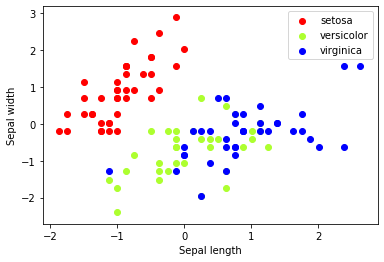

In [36]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

- 观察发现
    - 山鸢尾花 最容易区分
    - 变色鸢尾花和维吉利亚鸢尾花混在一起

## 13.4 分类识别训练

### 13.4.1 基于随机梯度下降法的分类识别训练


#### (1) 方法与分类器介绍


- 随机梯度下降法 —— SGD, Stochastic Gradient Descent
    - 一种寻找函数的局部最小值方法，比较著名
    - 对于本例：算法通过最小化损失函数，<font color="red">学习超平面的系数</font>
<img src="images\ch13\lossfunc.png" width = 400>

- SGDClassifier 分类器
    - 分类器（Classifier）的一种、基于随机梯度下降（Stochastic Gradient Descent）算法


In [43]:
# 创建对象 线性模型分类器 linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

#### (2)  随机梯度下降法介绍
#### 梯度
- 在微积分里面，对多元函数的参数求∂偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。
- 比如函数f(x,y), 分别对x,y求偏导数，求得的梯度向量就是(∂f/∂x, ∂f/∂y)T,简称grad f(x,y)或者▽f(x,y)。
- 对于在点(x0,y0)的具体梯度向量就是(∂f/∂x0, ∂f/∂y0)T.或者▽f(x0,y0)，如
- 果是3个参数的向量梯度，就是(∂f/∂x, ∂f/∂y，∂f/∂z)T,以此类推。
- 梯度向量求出来有什么意义呢？他的意义从几何意义上讲，就是函数变化增加最快的地方。

#### 梯度下降与梯度上升
- 在机器学习算法中，在最小化损失函数时，可以通过梯度下降法来一步步的迭代求解，得到最小化的损失函数，和模型参数值。
- 反过来，如果我们需要求解损失函数的最大值，这时就需要用梯度上升法来迭代了。

- 梯度下降法和梯度上升法是可以互相转化的。比如我们需要求解损失函数f(θ)的最小值，这时我们需要用梯度下降法来迭代求解。
- 但是实际上，我们可以反过来求解损失函数 -f(θ)的最大值，这时梯度上升法就派上用场了。

#### 梯度下降法算法详解
##### 梯度下降的直观解释
- 比如我们在一座大山上的某处位置，由于我们不知道怎么下山，于是决定走一步算一步，也就是在每走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经到了山脚。当然这样走下去，有可能我们不能走到山脚，而是到了某一个局部的山峰低处。
- 从上面的解释可以看出，梯度下降不一定能够找到全局的最优解，有可能是一个局部最优解。当然，如果损失函数是凸函数，梯度下降法得到的解就一定是全局最优解。
<img src = 'images\ch13\ch13-01.png'>

### 动画演示搜索过程
<img src = 'images\ch13\ch13-02.gif'>

#### (3) 分类器之成员函数 `fit`


- 语法
```python
>>> clf.fit(X_train, y_train)
```


- 功能
    - 基于训练数据训练模型
    - 创建超平面

In [44]:
# 拟合（训练）分类器
clf.fit(X_train, y_train) # 注意参数设置警告

SGDClassifier()

### 13.4.2 训练成果 及 可视化展示


- 学习效果
    - 系数数组 coef_  $\quad(c_1,c_2,\cdots)$
    - 截距数组 intercept_ $p$


- 分界线方程 —— 超平面方程 $\quad c_1f_1+c_2f_2 + \cdots = p$
     - $c_1,\,c_2,\,\cdots$ 系数
     - $f_1,\,f_2,\,\cdots$ 特征值
     - $p$ 右端项


- 三次二元识别
    - 将得到三组系数和截距

In [45]:
# 输出 学习得到的系数
print (clf.coef_)
print (clf.intercept_)

[[-11.92715633   8.47483938]
 [  0.22413954  -5.25471945]
 [  3.22799247  -0.3218558 ]]
[-9.42562758 -1.8786716  -2.09406427]


- 可视化展示
    - 画出三条决策曲线
    - 效果
        - 类别 1 可以直线分开
        - 类另 2 和 3 不能分开

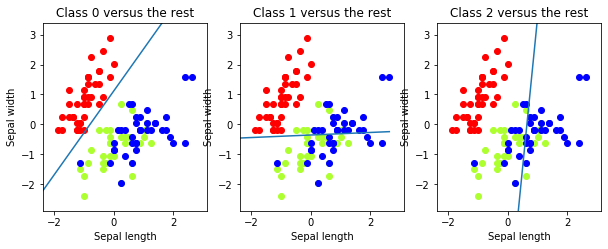

In [46]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5 # 找出最大最小值，用于画图
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5) #xs数据（绘制直线用）
fig, axes = plt.subplots(1,3)  #三个图
fig.set_size_inches(10,6)  #设置图大小
for i in [0,1,2]:  #按图循环
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in range(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]  #ys数据（绘制直线用）
    plt.plot(xs,ys);#,hold=True)

Let's how our classifier can predict the class of a certain instance, given its sepal length and width:

### 13.4.3 预测未来新数据

- 假设新数据（萼片的长度、宽度）为
    - [4.7,3.1]


- 操作过程
    - 同样的数据预处理
    - 三次二元分类识别
    - 输出结果

In [47]:
# 新数据
new_data = [4.7, 3.1]
new_data

[4.7, 3.1]

In [48]:
# 感兴趣的同学，可以反复运行，检查预测结果是否变化

In [49]:
scaler.transform([new_data])

array([[-1.36686898,  0.03349164]])

In [50]:
# 预处理
pre_process_data = scaler.transform([new_data])
pre_process_data

array([[-1.36686898,  0.03349164]])

In [51]:
# 类型预测 0-setosa, 1-versicolor, 2-virginica
print (clf.predict(pre_process_data))

[0]


In [52]:
# 三个决策函数值筛选 —— 取最大值对应的类别
print(clf.decision_function(pre_process_data))

[[ 7.16106872 -2.36103014 -6.51708653]]


### 13.5 检验模型的效果

### 13.5.1 导入模块 `metrics`

In [53]:
from sklearn import metrics

### 13.5.2 对比目标值 —— 人工结果


- 调用函数
```python
>>> metrics.accuracy_score(y_train, y_train_pred)
```


- 参数
    - y_train 人工结果值
    - y_train_pred 预测值


- 返回值
    - score —— 分数介于 0 和 1 之间

In [54]:
# 根据模型得到的预测值
y_train_pred = clf.predict(X_train)

# 与人工值比较，并输出得分
train_score = metrics.accuracy_score(y_train, y_train_pred)
train_score

0.7946428571428571

### 12.5.3 用测试集来检验

In [55]:
# 测试集也要标准化
X_test = scaler.transform(X_test)

# 预测
y_pred = clf.predict(X_test)

# 与人工值比较，并输出得分
test_score = metrics.accuracy_score(y_test, y_pred)
test_score

0.7105263157894737

## 13.6  进一步分析

### 13.6.1 发现问题

- 训练集的分数比测试集更好！
    - $test\_score < train\_score$
- 为什么？
    - 合理而常见

### 13.6.2 试试更多的检验

- 分类准确率分数是指所有分类正确的百分比。分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。


- Precision
- Recall
- F-score
- 混淆矩阵 （the confusion matrix）

In [56]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names))
print (metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.67      0.62      0.65        16
   virginica       0.57      0.67      0.62        12

    accuracy                           0.71        38
   macro avg       0.75      0.73      0.74        38
weighted avg       0.72      0.71      0.72        38

[[ 9  1  0]
 [ 0 10  6]
 [ 0  4  8]]


- 准确率（正确率）=所有预测正确的样本/总的样本  （TP+TN）/总

- 精确率=  将正类预测为正类 / 所有预测为正类 TP/（TP+FP）

- 召回率 = 将正类预测为正类 / 所有正真的正类 TP/（TP+FN）

- F值 = 精确率 * 召回率 * 2 / (正确率 + 召回率) （F 值即为精确率和召回率的调和平均值）


### 混淆矩阵也称误差矩阵
<img src='images\ch13\ch13-04.jpg'><img src='images\ch13\ch13-03.jpg'>
- 精确率_类别1=a/(a+d+g)
- 召回率_类别1=a/(a+b+c)

### 13.6.3  K-折交叉检验分类器


- 创建一个新的分类器
    - 将数据集切分成 $k$ 部分
    - 取其中 $k-1$ 块进行训练
    - 取剩下的一块用来测试评估
    - 进行 $k$ 次，取平均得分


- pipeline （管道或管线），连接
    - 标准化器
    - 线性模型 —— 随机梯度下降分类器


- 交叉检验精度 —— 对每一折

<img src='images\ch13\ch13-05.jpg'>

#### (1) 流程更简洁

In [57]:
# 导入函数等
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline


### scikit_learn里的 pipeline
- pipeline 实现了对全部步骤的流式化封装和管理，可以很方便地使参数集在新数据集上被重复使用。
- pipeline 可以用于下面几处：
    - 模块化 Feature Transform，只需写很少的代码就能将新的 Feature 更新到训练集中。  
    - 自动化 Grid Search，只要预先设定好使用的 Model 和参数的候选，就能自动搜索并记录最佳的 Model。  
    - 自动化 Ensemble Generation，每隔一段时间将现有最好的 K 个 Model 拿来做 Ensemble。  
    - 要用 Pipeline 对训练集和测试集进行如下操作：
        - 先用 StandardScaler 对数据集每一列做标准化处理，（是 transformer）
        - 再用 PCA 将原始的 30 维度特征压缩的 2 维度，（是 transformer）
        - 最后再用模型 LogisticRegression。（是 Estimator）
        - 调用 Pipeline 时，输入由元组构成的列表，每个元组第一个值为变量名，元组第二个元素是 sklearn 中的 transformer 或 Estimator。
        - 注意中间每一步是 transformer，即它们必须包含 fit 和 transform 方法，或者 fit_transform。
        - 最后一步是一个 Estimator，即最后一步模型要有 fit 方法，可以没有 transform 方法。
    - Pipeline对象接受二元tuple构成的list，每一个二元 tuple 中的第一个元素为 arbitrary identifier string，我们用以获取（access）Pipeline object 中的 individual elements，二元 tuple 中的第二个元素是 scikit-learn与之相适配的transformer 或者 estimator。  
<img src='images\ch13\sklearn_pipeline.png'>

In [58]:
# 创建管线实现的复合估计器
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])

In [59]:
# 创建 k-折交叉验证迭代器，取 k=5
# cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
cv = KFold(5, shuffle=True, random_state=33)

In [60]:
#KFold?

In [61]:
# 得分
cross_scores = cross_val_score(clf, X, y, cv=cv)
print(cross_scores)

[0.6        0.76666667 0.83333333 0.7        0.7       ]


#### (2) 交叉验证精度的均值和标准差

In [62]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print(mean_score(cross_scores))

Mean score: 0.720 (+/-0.039)


### 13.7 知识梳理

- 主要流程
    - 初识问题数据 —— 加载、观察、初步统计分析等
    - 数据准备
        - 导入特征、目标数据
        - 选取重要特征 （重要环节）
        - 数据分解
        - 数据预处理
        - 数据可视化
    - 分类识别训练
        - 选取方法与分类器
        - 创建分类器对象
        - 训练拟合 fit
        - 检验训练成果
        - 预测新数据
    - 检验模型的效果
        - 训练集检验
        - 测试集检验
    - 进一步分析
        - 发现问题
        - 改进方法
            - 调整参数
            - 选择其它方法
            - 属性重新组合
            - 等

In [63]:
# 大家尝试用另外两个属性进行分类？
# 并反馈平均得分


## 12.7  其他类似例子

In [64]:
import pandas as pd
import numpy as np

# features column names
column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size' ,'Uniformity of Cell Shape','Marginal Adhesion',
'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

#read data from csv file
##data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=column_names)
data = pd.read_csv('data/breast-cancer-wisconsin.data',names=column_names)
#data = pd.read_csv('data/breast-cancer-wisconsin.data',names=column_names)

FileNotFoundError: [Errno 2] File b'data/breast-cancer-wisconsin.data' does not exist: b'data/breast-cancer-wisconsin.data'

<img src='images\ch13\ch13-06.jpg' width =500>

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.describe()

In [ ]:
#Data preprocessing
#replace all ? with standard missing value

data = data.replace(to_replace='?',value=np.nan)

#drop all data rows which have any missing feature
data=data.dropna(how='any')

# data.to_csv('data\text.csv')# save data to csv file

In [ ]:
data.describe()

In [ ]:
#notes:you should use cross_valiation instead of model_valiation in python 2.7

#from sklearn.cross_validation import train_test_split #DeprecationWarning

from sklearn.model_selection import train_test_split #use train_test_split module of sklearn.model_valiation to split data

In [ ]:
#take 25 percent of data randomly for testing,and others for training

X_train,X_test,y_train,y_test = train_test_split(data[column_names[1:10]],data[column_names[10]],test_size=0.25,random_state=33)

#check the numbers and category distribution of the test samples
# print(y_train.value_counts())
# print(y_test.value_counts())

#import relative package
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

#standardizing data in train set and test set
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#sgdcclassifier model
#sgdc=SGDClassifier() #DeprecationWarning

sgdc=SGDClassifier(max_iter=5,tol=None)

#call fit function to trainning arguments ofmodel
sgdc.fit(X_train,y_train)

sgdc_y_predict=sgdc.predict(X_test)

In [ ]:
#performance analysis
from sklearn.metrics import classification_report

#get accuracy by the score function in SGD classifier
print('Accuracy of SGD Classifier:',sgdc.score(X_test,y_test))

#get  precision ,recall and f1-score from classification_report module
print(classification_report(y_test,sgdc_y_predict,target_names=['Benign','Malignant']))

In [ ]:
# 导入函数等
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [ ]:
# 创建管线实现的复合估计器
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])

In [ ]:
X, y = data[column_names[1:10]], data[column_names[10]]

In [ ]:
# 创建 k-折交叉验证迭代器，取 k=5
#cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
cv = KFold(5, shuffle=True, random_state=33)

In [ ]:
cv

In [ ]:
# 得分
cross_scores = cross_val_score(clf, X, y, cv=cv)  #检查数据是否有缺失？
print(cross_scores)

In [ ]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print(mean_score(cross_scores))

### 第13讲 结束

# 葡萄酒分类！
<img src='images\ch13\ch13-08.png' width =500>

In [ ]:
# 练习！
#https://archive.ics.uci.edu/ml/datasets/Wine
column_names  = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_names)
data = pd.read_csv('data/wine.data',names=column_names)

<img src='images\ch13\ch13-07.png' width =500>

In [ ]:
data.tail()

In [ ]:
# 请用本堂课的知识，建立一个分类器
